In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
transition_probabilities = [ # shape=[s, a, s']
    [[0.7, 0.3, 0.0], [1.0, 0.0, 0.0], [0.8, 0.2, 0.0]],
    [[0.0, 1.0, 0.0], None,            [0.0, 0.0, 1.0]],
    [None,            [0.8, 0.1, 0.1], None           ]
]
rewards = [ # shape=[s, a, s']
    [[ +10,   0,   0], [   0,   0,   0], [   0,   0,   0]],
    [[   0,   0,   0], [   0,   0,   0], [   0,   0, -50]],
    [[   0,   0,   0], [ +40,   0,   0], [   0,   0,   0]]
]
possible_actions = [
    [0, 1, 2], 
    [0, 2], 
    [1]
]

num_states = len(transition_probabilities)
all_states = tuple(range(num_states))
num_actions = len(possible_actions)
all_actions = tuple(range(num_actions))
print(f"num_states = {num_states}, all_states = {all_states}")
print(f"num_actions = {num_actions}, all_actions = {all_actions}")

num_states = 3, all_states = (0, 1, 2)
num_actions = 3, all_actions = (0, 1, 2)


In [3]:
def init_q_values():
    q_values = np.full((num_actions, num_actions), -np.inf) # -np.inf for impossible actions
    for state, actions in enumerate(possible_actions):
        q_values[state, actions] = 0.0  # for all possible actions
    return q_values

def compute_q_values(gamma, num_iters=50):
    history = []
    q_values = init_q_values()

    for iteration in range(num_iters):
        q_prev = q_values.copy()
        history.append(q_prev)
        for s in all_states:
            for a in possible_actions[s]:
                q_values[s, a] = 0
                for sp in all_states:
                    q_values[s, a] += transition_probabilities[s][a][sp] * (rewards[s][a][sp] + gamma * np.max(q_prev[sp]))
    return q_values, np.array(history)    

In [4]:
q_values_90, history_1 = compute_q_values(0.90)
display(q_values_90)
np.argmax(q_values_90, axis=1)

array([[18.91891892, 17.02702702, 13.62162162],
       [ 0.        ,        -inf, -4.87971488],
       [       -inf, 50.13365013,        -inf]])

array([0, 0, 1], dtype=int64)

In [5]:
q_values_95, _ = compute_q_values(0.95)
display(q_values_95)
np.argmax(q_values_95, axis=1)

array([[21.73304188, 20.63807938, 16.70138772],
       [ 0.95462106,        -inf,  1.01361207],
       [       -inf, 53.70728682,        -inf]])

array([0, 2, 1], dtype=int64)

In [6]:
def step(state, action):
    probs = transition_probabilities[state][action]
    next_state = np.random.choice(all_actions, p=probs)
    reward = rewards[state][action][next_state]
    return next_state, reward

In [7]:
def exploration_policy(state):
    return np.random.choice(possible_actions[state])

In [8]:
np.random.seed(42)

alpha0 = 0.05 # initial learning rate
decay = 0.005 # learning rate decay
gamma = 0.90 # discount factor
state = 0 # initial state
history_2 = [] # Not shown in the book

q_values = init_q_values()

for iteration in range(10000):
    history_2.append(q_values.copy())
    action = exploration_policy(state)
    next_state, reward = step(state, action)
    next_value = np.max(q_values[next_state])
    alpha = alpha0 / (1 + iteration * decay)
    q_values[state, action] = (1 - alpha) * q_values[state, action] + alpha * (reward + gamma * next_value)
    state = next_state

history_2 = np.array(history_2)

display(q_values)
np.argmax(q_values_90, axis=1)

array([[18.77621289, 17.2238872 , 13.74543343],
       [ 0.        ,        -inf, -8.00485647],
       [       -inf, 49.40208921,        -inf]])

array([0, 0, 1], dtype=int64)

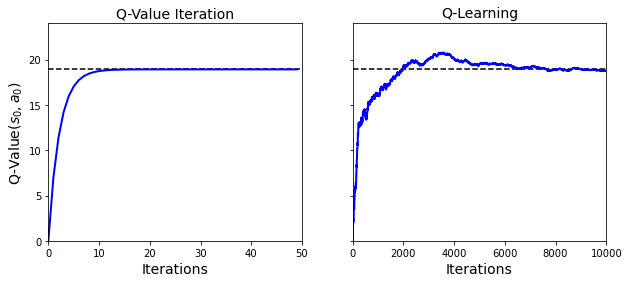

In [9]:
true_q_value = history_1[-1, 0, 0]

fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

axes[0].set_ylabel("Q-Value$(s_0, a_0)$", fontsize=14)
axes[0].set_title("Q-Value Iteration", fontsize=14)
axes[1].set_title("Q-Learning", fontsize=14)
for ax, width, history in zip(axes, (50, 10000), (history_1, history_2)):
    ax.plot([0, width], [true_q_value, true_q_value], "k--")
    ax.plot(np.arange(width), history[:, 0, 0], "b-", linewidth=2)
    ax.set_xlabel("Iterations", fontsize=14)
    ax.axis([0, width, 0, 24])

plt.show()